## IRIS CLASS PREDICTION

In [1]:
import pandas as pd
print('pandas version is: {}'.format(pd.__version__))
import numpy
print('numpy version is: {}'.format(numpy.__version__))
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

pandas version is: 1.5.3
numpy version is: 1.23.5


# IMPORTING DATASET

In [2]:
iris=pd.read_csv('Iris.csv')

In [3]:
iris.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# ANALYSE AND VISULIZE DATASET

In [4]:
print(len(iris['Species']))

150


In [5]:
for col in iris.columns:
    print(col)

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


In [6]:
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<Axes: xlabel='Species', ylabel='PetalWidthCm'>

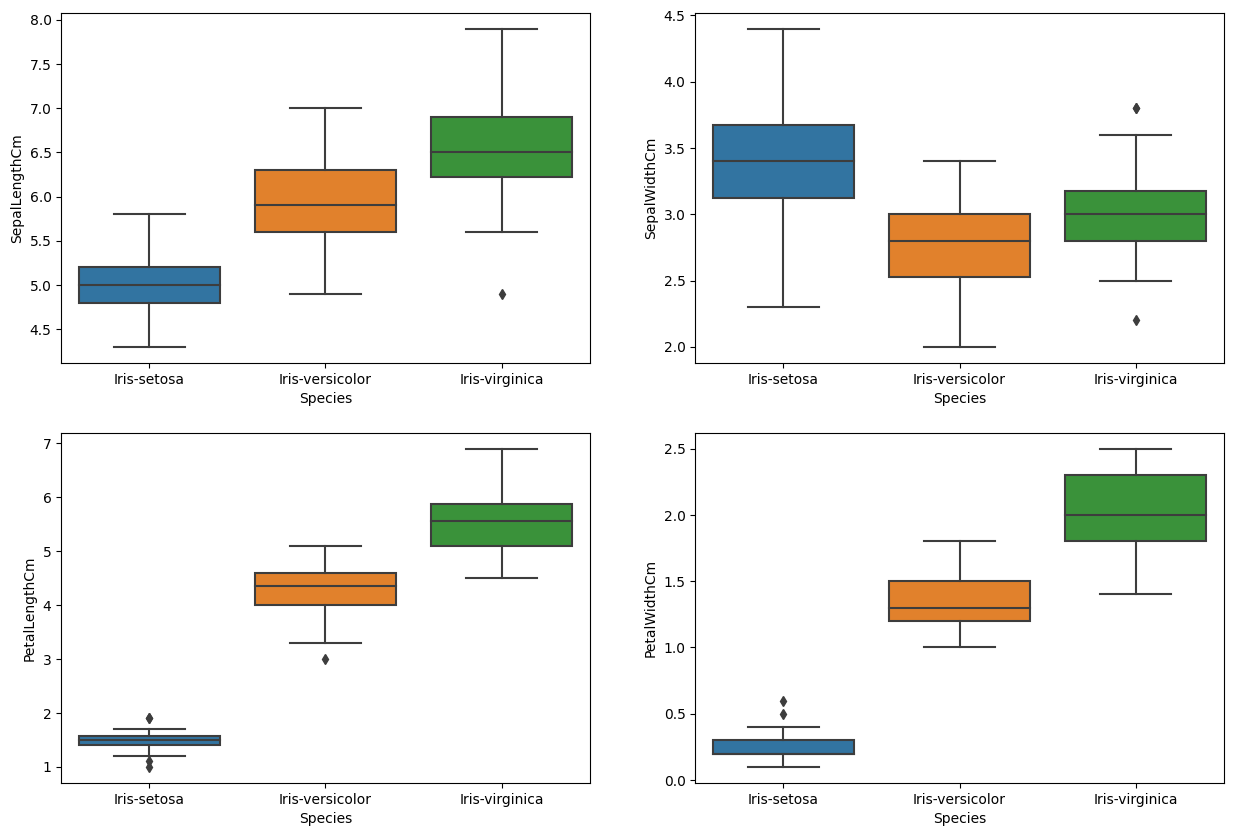

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species', y='PetalWidthCm', data=iris)

Data Cleaning

In [8]:
iris.isnull().values.any()

False

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# SPLITTING UP DATA

In [10]:
from sklearn.model_selection import train_test_split
array=iris.values
X=array[:,0:4]
Y=array[:,4]
Y=Y.astype('int')
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=0)

# APPLY ALGORITHMS AND EVALUATE

# SUPPORT VECTOR CLASSIFICATION

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(max_iter=100,gamma='auto')
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(accuracy_score(Y_pred, Y_test), 2) * 100
print("accuracy:" ,acc_svc)

accuracy: 89.0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# LOGISTIC REGRESSION

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,classification_report
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg1 = round(accuracy_score(Y_pred, Y_test), 2) * 100
print("Accuracy : ", acc_logreg1)

Accuracy :  89.0


# DECISION TREE CLASSIFIER

In [13]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_train, Y_train)
Y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(Y_pred, Y_test), 2) * 100
print("Accuracy : ", acc_decisiontree)


Accuracy :  84.0
